# Importing Libraries

In [5]:
import tensorflow as tf
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt

# Loading Model

In [2]:
model = tf.keras.models.load_model('../models/trained_model.keras')

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 400)            │     6,554,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        15,238 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,224,484 (88.59 MB)

 Trainable params: 7,741,494 (29.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,482,990 (59.06 MB)

# Visualizing Single Image of Test Set

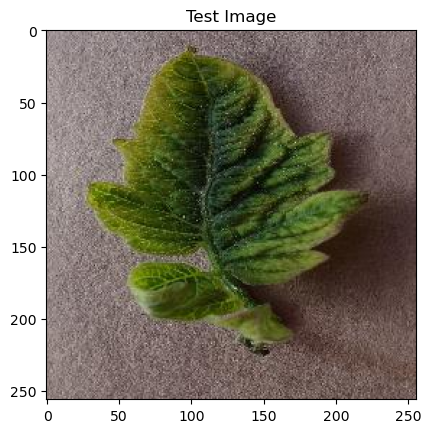

In [28]:
image_path = "../data/test/TomatoYellowCurlVirus1.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Test Image")
plt.show()

# Predicting Class for the Image

In [29]:
with open("../models/classnames.json","r") as f:
    class_names = json.load(f)

In [30]:
img = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(img)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [31]:
prediction = model.predict(input_arr)
prediction, prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


(array([[3.7446162e-12, 3.3248133e-11, 8.7825454e-09, 2.5143558e-09,
         1.4133785e-11, 1.5903666e-10, 2.2982875e-15, 1.6798073e-13,
         6.2742066e-17, 5.8965935e-12, 1.4307018e-15, 1.7760416e-09,
         4.2245660e-09, 1.3423325e-10, 2.0219692e-12, 2.7079322e-10,
         1.9455962e-08, 7.3161104e-12, 1.7508573e-04, 1.2287564e-11,
         4.7394355e-17, 5.1404749e-07, 2.2036939e-09, 5.8872445e-08,
         2.0962619e-11, 2.2045556e-09, 6.2620220e-10, 5.8622926e-11,
         1.9055063e-06, 1.1900049e-05, 8.2254547e-07, 5.1199459e-07,
         1.8278796e-07, 5.5103943e-02, 3.4854739e-04, 9.4435638e-01,
         1.7988084e-07, 8.8407299e-09]], dtype=float32),
 (1, 38))

In [32]:
predicted_class_index = np.argmax(prediction)
predicted_class_index

35

In [33]:
predicted_class = class_names[predicted_class_index]
predicted_class

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'